<a href="https://colab.research.google.com/github/DMYomal/Spark_Big_Data_Covid_Analysis/blob/main/Final_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Install Spark

In [ ]:
#Updating system packages (generally recommended)
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [ ]:
#Installing Java development kit (JDK)
#To run Spark, we need Java Runtime Environment (JRE)
#JDK also includes JRE.
!sudo apt install default-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jdk-headless default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm
  mesa-utils
The following NEW packages will be installed:
  default-jdk default-jdk-headless default-jre default-jre-headless
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev libxkbfile1
  libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
0 upgraded, 18 newly installed, 0 to remove and 16 not upgraded.
Need to get 5,509 kB of archives.
After this operation, 15.8 MB of additional disk space will be u

In [ ]:
#Downloading Apache Spark files
#Please note the Spark version (3.0 upwards)
!wget https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

#Extracting files
!tar xvf spark-3.3.2-bin-hadoop3.tgz

--2023-08-01 23:06:05--  https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  25.7MB/s    in 12s     

2023-08-01 23:06:17 (24.2 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

spark-3.3.2-bin-hadoop3/
spark-3.3.2-bin-hadoop3/LICENSE
spark-3.3.2-bin-hadoop3/NOTICE
spark-3.3.2-bin-hadoop3/R/
spark-3.3.2-bin-hadoop3/R/lib/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/f

In [ ]:
#Showing list of files in te current directory
!ls

drive  sample_data  spark-3.3.2-bin-hadoop3  spark-3.3.2-bin-hadoop3.tgz


In [ ]:
#Installing findspark and pyspark --
#findspark makes pyspark importable as a regular library
!pip install findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=bc333b0ff68d7334c85ea45578f0a75febb45c473eccbd924e81b142baeea3b5
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
#Setting the environment path
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

In [ ]:
#Running a local SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession

#Creating a SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# #Pyspark shell
# !pyspark


##2.Data Cleansing and Data Preprocessing

In [ ]:
#Connect with the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    covid_df = spark.read.csv('/content/drive/MyDrive/1.Data Science - UWE/Big Data/BIG Data Assignment/COVID-19 Cases.csv', header=True, inferSchema=True)
except Exception as e:
    print("Error occurred while loading data: ", e)

In [ ]:
#Display All the columns
pd.set_option('display.max_columns', None)

In [ ]:
# covid_df =pd.read_csv('/content/drive/MyDrive/1.Data Science - UWE/Big Data/BIG Data Assignment/COVID-19 Cases.csv')
#Let's check out the dataset shape (rows x columns)
print("Dataframe Shape: ", (covid_df.count(), len(covid_df.columns)))

Dataframe Shape:  (950670, 18)


In [ ]:
covid_df.show()

+---------+-------------------------+-----+----------+---------+--------------------+--------------------+--------------------+------+----+----+----+----------+----------+----------------+------------------------------------+--------------------+-----------------+
|Case_Type|People_Total_Tested_Count|Cases|Difference|     Date|        Combined_Key|      Country_Region|      Province_State|Admin2|iso2|iso3|FIPS|       Lat|      Long|Population_Count|People_Hospitalized_Cumulative_Count|         Data_Source|Prep_Flow_Runtime|
+---------+-------------------------+-----+----------+---------+--------------------+--------------------+--------------------+------+----+----+----+----------+----------+----------------+------------------------------------+--------------------+-----------------+
|Confirmed|                     null|    6|         0|5/22/2020|      Western Sahara|      Western Sahara|                 N/A|  null|  EH| ESH|null|   24.2155|  -12.8858|          597330|                 

In [ ]:
#Showing dataframe columns
covid_df.columns

['Case_Type',
 'People_Total_Tested_Count',
 'Cases',
 'Difference',
 'Date',
 'Combined_Key',
 'Country_Region',
 'Province_State',
 'Admin2',
 'iso2',
 'iso3',
 'FIPS',
 'Lat',
 'Long',
 'Population_Count',
 'People_Hospitalized_Cumulative_Count',
 'Data_Source',
 'Prep_Flow_Runtime']

In [ ]:
#Showing dataframe columns + data types
covid_df.printSchema()

root
 |-- Case_Type: string (nullable = true)
 |-- People_Total_Tested_Count: integer (nullable = true)
 |-- Cases: integer (nullable = true)
 |-- Difference: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Combined_Key: string (nullable = true)
 |-- Country_Region: string (nullable = true)
 |-- Province_State: string (nullable = true)
 |-- Admin2: string (nullable = true)
 |-- iso2: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- FIPS: integer (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Population_Count: integer (nullable = true)
 |-- People_Hospitalized_Cumulative_Count: integer (nullable = true)
 |-- Data_Source: string (nullable = true)
 |-- Prep_Flow_Runtime: string (nullable = true)



In [ ]:
# Access the dtypes attribute to see the data types of each column
data_types = covid_df.dtypes
# Print the data types of all columns
print(data_types)

[('Case_Type', 'string'), ('People_Total_Tested_Count', 'int'), ('Cases', 'int'), ('Difference', 'int'), ('Date', 'string'), ('Combined_Key', 'string'), ('Country_Region', 'string'), ('Province_State', 'string'), ('Admin2', 'string'), ('iso2', 'string'), ('iso3', 'string'), ('FIPS', 'int'), ('Lat', 'double'), ('Long', 'double'), ('Population_Count', 'int'), ('People_Hospitalized_Cumulative_Count', 'int'), ('Data_Source', 'string'), ('Prep_Flow_Runtime', 'string')]


In [ ]:
#Finding the count of missing values in each column
from pyspark.sql.functions import when, count, col, isnan
covid_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in covid_df.columns]).show()

+---------+-------------------------+-----+----------+----+------------+--------------+--------------+------+----+----+------+-----+-----+----------------+------------------------------------+-----------+-----------------+
|Case_Type|People_Total_Tested_Count|Cases|Difference|Date|Combined_Key|Country_Region|Province_State|Admin2|iso2|iso3|  FIPS|  Lat| Long|Population_Count|People_Hospitalized_Cumulative_Count|Data_Source|Prep_Flow_Runtime|
+---------+-------------------------+-----+----------+----+------------+--------------+--------------+------+----+----+------+-----+-----+----------------+------------------------------------+-----------+-----------------+
|        0|                   944622|    0|         0|   0|           0|             0|             0| 72090| 810| 810|100980|28890|28890|           28890|                              944622|          0|                0|
+---------+-------------------------+-----+----------+----+------------+--------------+--------------+------

In [ ]:
# Fill missing values with "NULL"
covid_df = covid_df.fillna(value="NULL")

# Show the DataFrame with missing values filled with "NULL"
print(covid_df)

DataFrame[Case_Type: string, People_Total_Tested_Count: int, Cases: int, Difference: int, Date: string, Combined_Key: string, Country_Region: string, Province_State: string, Admin2: string, iso2: string, iso3: string, FIPS: int, Lat: double, Long: double, Population_Count: int, People_Hospitalized_Cumulative_Count: int, Data_Source: string, Prep_Flow_Runtime: string]


In [ ]:
#Removing unnecessary columns
covid_df = covid_df.drop('iso2', "iso3")
covid_df.printSchema()

root
 |-- Case_Type: string (nullable = false)
 |-- People_Total_Tested_Count: integer (nullable = true)
 |-- Cases: integer (nullable = true)
 |-- Difference: integer (nullable = true)
 |-- Date: string (nullable = false)
 |-- Combined_Key: string (nullable = false)
 |-- Country_Region: string (nullable = false)
 |-- Province_State: string (nullable = false)
 |-- Admin2: string (nullable = false)
 |-- FIPS: integer (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Population_Count: integer (nullable = true)
 |-- People_Hospitalized_Cumulative_Count: integer (nullable = true)
 |-- Data_Source: string (nullable = false)
 |-- Prep_Flow_Runtime: string (nullable = false)



In [ ]:
dfWithDeathCases = covid_df.withColumn("case_type", col("case_type").cast("int"))

In [ ]:
# Group by count of death
grouped_df = covid_df.groupBy("Case_type") \
              .agg(count("Cases").alias("Total_death_count"))

# Show the result
grouped_df.show()


+---------+-----------------+
|Case_type|Total_death_count|
+---------+-----------------+
|   Deaths|           475335|
|Confirmed|           475335|
+---------+-----------------+



In [ ]:
df = covid_df

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, month, year, concat_ws, to_date

# Convert the "Date" column to a date type
df = df.withColumn("Date", to_date(col("Date"), "M/d/yyyy"))

# Extract the month and year from the "Date" column and create a new column "MonthYear"
df_with_month_year = df.withColumn("MonthYear", concat_ws("-", year(col("Date")), month(col("Date"))))

# Convert the "Date" column to a date type
df = df.withColumn("Date", to_date(col("Date"), "M/d/yyyy"))

# Extract the month and year from the "Date" column and create a new column "MonthYear"
df_with_month_year = df.withColumn("MonthYear", concat_ws("-", year(col("Date")), month(col("Date"))))

# Group by "case_type" and "MonthYear" columns and get the number of cases per "case_type" in each month and year
for m in range(1, 7):  # Assuming you have data for months 1 to 6 (January to June)
    grouped_df = df_with_month_year.filter(month(col("Date")) == m).filter(year(col("Date")) == 2020) \
                                   .groupBy("Case_type", "MonthYear") \
                                   .agg(sum("Cases").alias("Total_Cases"))

    print(f"Month: {m}")
    grouped_df.show()


Month: 1
+---------+---------+-----------+
|Case_type|MonthYear|Total_Cases|
+---------+---------+-----------+
|Confirmed|   2020-1|      38534|
|   Deaths|   2020-1|        889|
+---------+---------+-----------+

Month: 2
+---------+---------+-----------+
|Case_type|MonthYear|Total_Cases|
+---------+---------+-----------+
|Confirmed|   2020-2|    1671539|
|   Deaths|   2020-2|      46898|
+---------+---------+-----------+

Month: 3
+---------+---------+-----------+
|Case_type|MonthYear|Total_Cases|
+---------+---------+-----------+
|Confirmed|   2020-3|    8898208|
|   Deaths|   2020-3|     397435|
+---------+---------+-----------+

Month: 4
+---------+---------+-----------+
|Case_type|MonthYear|Total_Cases|
+---------+---------+-----------+
|   Deaths|   2020-4|    4291772|
|Confirmed|   2020-4|   63018775|
+---------+---------+-----------+

Month: 5
+---------+---------+-----------+
|Case_type|MonthYear|Total_Cases|
+---------+---------+-----------+
|Confirmed|   2020-5|  144775414|

In [ ]:
from pyspark.sql.functions import col, sum


# Group by "Country_Region" and "Case_type" columns and get the summation of "Cases" for each group
grouped_df = df.groupBy("Country_Region", "Case_type") \
               .agg(sum("Cases").alias("Total_Cases"))

# Show the result
grouped_df.show()

+--------------------+---------+-----------+
|      Country_Region|Case_type|Total_Cases|
+--------------------+---------+-----------+
|              Guyana|   Deaths|        567|
|         Timor-Leste|   Deaths|          0|
|              Cyprus|   Deaths|        969|
|          Montenegro|Confirmed|      20223|
|               Haiti|   Deaths|        935|
|           Indonesia|   Deaths|      57538|
|                Peru|Confirmed|    3973392|
|               Ghana|   Deaths|       1262|
|Bosnia and Herzeg...|   Deaths|       5697|
|            Portugal|Confirmed|    1603921|
|            Paraguay|   Deaths|        603|
|                Fiji|Confirmed|       1141|
|              Brazil|   Deaths|     704282|
|             Croatia|Confirmed|     133187|
|         New Zealand|   Deaths|       1015|
|            Ethiopia|   Deaths|        293|
|             Nigeria|   Deaths|       7311|
|              Angola|Confirmed|       2632|
|         Saint Lucia|   Deaths|          0|
|        S

In [ ]:
# Group by "Country_Region" and "Case_type" columns and get the sum of confirmed and deaths cases for each country
grouped_df = df.groupBy("Country_Region", "Case_type") \
               .agg(sum("Cases").alias("Total_Cases"))

# Find the country that has the highest number of confirmed cases
highest_confirmed_country = grouped_df.filter(col("Case_type") == "Confirmed") \
                                      .orderBy(col("Total_Cases").desc()) \
                                      .limit(10)

# Find the country that has the highest number of deaths
highest_deaths_country = grouped_df.filter(col("Case_type") == "Deaths") \
                                   .orderBy(col("Total_Cases").desc()) \
                                   .limit(10)

# Show the result
print("Country with the highest confirmed cases:")
highest_confirmed_country.show()

print("Country with the highest deaths:")
highest_deaths_country.show()

Country with the highest confirmed cases:
+--------------+---------+-----------+
|Country_Region|Case_type|Total_Cases|
+--------------+---------+-----------+
|            US|Confirmed|   73158080|
|         Spain|Confirmed|   14042683|
|         Italy|Confirmed|   13991688|
|United Kingdom|Confirmed|   11634123|
|        Brazil|Confirmed|   11310710|
|        Russia|Confirmed|   11108581|
|       Germany|Confirmed|   10695564|
|        France|Confirmed|   10441318|
|         China|Confirmed|    9628865|
|        Turkey|Confirmed|    7342848|
+--------------+---------+-----------+

Country with the highest deaths:
+--------------+---------+-----------+
|Country_Region|Case_type|Total_Cases|
+--------------+---------+-----------+
|            US|   Deaths|    4162893|
|         Italy|   Deaths|    1868769|
|United Kingdom|   Deaths|    1678116|
|         Spain|   Deaths|    1546134|
|        France|   Deaths|    1469256|
|        Brazil|   Deaths|     704282|
|       Belgium|   Deaths| 

In [ ]:
# Separate the data based on the "Case_type" column and calculate the summation of "Cases" for each group
grouped_df = df.groupBy("Province_State") \
               .agg(sum(when(col("Case_type") == "Confirmed", col("Cases"))).alias("Total_Confirmed"),
                    sum(when(col("Case_type") == "Deaths", col("Cases"))).alias("Total_Deaths"))

# Show the result
grouped_df.show()

+--------------------+---------------+------------+
|      Province_State|Total_Confirmed|Total_Deaths|
+--------------------+---------------+------------+
|                Utah|         350111|        3654|
|              Hawaii|          38631|         862|
|            Manitoba|          17844|         375|
|            Anguilla|            202|           0|
|           Guangdong|         181168|         849|
|           Minnesota|         641701|       30097|
|                Ohio|        1293137|       71574|
|              Shanxi|          19895|           0|
|               Hunan|         124634|         450|
|               Tibet|            127|           0|
|               Hubei|        7860585|      412796|
|               Yukon|            667|           0|
|             Tianjin|          19990|         349|
|             Beijing|          64004|         906|
|  Northern Territory|           1954|           0|
|Northern Mariana ...|           1036|         152|
|           

In [ ]:
from pyspark.sql.functions import col, sum, to_date


# Convert the "Date" column to a date type with the correct date format
df_with_date = df.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy"))

# Group by "Country_Region," "Case_type," and "Date" columns and get the sum of confirmed and deaths cases for each day
grouped_df = df_with_date.groupBy("Country_Region", "Case_type", "Date") \
                         .agg(sum("Cases").alias("Daily_Cases"))

# Show the result
grouped_df.show()

+--------------------+---------+----------+-----------+
|      Country_Region|Case_type|      Date|Daily_Cases|
+--------------------+---------+----------+-----------+
|           Australia|Confirmed|2020-04-07|       5895|
|               China|   Deaths|2020-01-28|        131|
|             Finland|   Deaths|2020-02-26|          0|
|       Guinea-Bissau|   Deaths|2020-04-15|          0|
|             Namibia|   Deaths|2020-05-02|          0|
|               Libya|Confirmed|2020-05-05|         63|
|          Kyrgyzstan|   Deaths|2020-03-08|          0|
|                Iran|Confirmed|2020-02-12|          0|
|       Cote d'Ivoire|   Deaths|2020-03-04|          0|
|Sao Tome and Prin...|   Deaths|2020-05-25|         11|
|             Lesotho|Confirmed|2020-01-23|          0|
|               China|Confirmed|2020-04-14|      83306|
|              Mexico|Confirmed|2020-05-26|      74560|
|             Bolivia|   Deaths|2020-02-23|          0|
|       Cote d'Ivoire|Confirmed|2020-03-27|     

##Data Visualization using Pandas

In [ ]:
#convert Spark data frame into pandas data frame
covid_df_pd = covid_df.toPandas()

In [ ]:
# Convert 'date_column' to datetime format
covid_df_pd['Date'] = pd.to_datetime(covid_df_pd['Date'])

In [ ]:
covid_df_pd['Year'] = covid_df_pd['Date'].dt.year
covid_df_pd['Day'] = covid_df_pd['Date'].dt.dayofyear
covid_df_pd['Month'] = covid_df_pd['Date'].dt.month_name()
covid_df_pd['Month_No'] = covid_df_pd['Date'].dt.month
# Create new column with year and month name in the desired format
covid_df_pd['year_month'] = covid_df_pd['Date'].dt.strftime('%Y-%b')

In [ ]:
#Sort the data frame according to year and month
covid_df_pd_sorted = covid_df_pd.sort_values('Date')

In [ ]:
covid_df_pd_sorted.head(2)

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,Year,Day,Month,Month_No,year_month
950669,Confirmed,NaN,0,0,2020-01-22,"Marion, Mississippi, US",US,Mississippi,Marion,US,USA,28091.0,31.231326,-89.820922,24573.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 23:15,2020,22,January,1,2020-Jan
909696,Deaths,NaN,0,0,2020-01-22,"Hopewell, Virginia, US",US,Virginia,Hopewell,US,USA,51670.0,37.291863,-77.297547,22529.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 23:15,2020,22,January,1,2020-Jan


In [ ]:
# Filter data based on 'Confirmed'
covid_df_pd_confirmed = covid_df_pd_sorted[covid_df_pd_sorted['Case_Type'] == 'Confirmed']
covid_df_pd_confirmed.shape

(475335, 23)

In [ ]:
# Filter data based on 'Deaths'
covid_df_pd_death = covid_df_pd_sorted[covid_df_pd_sorted['Case_Type'] == 'Deaths']
covid_df_pd_death.shape

(475335, 23)

In [ ]:
Month_confirmed_Sum = covid_df_pd_confirmed.groupby(['Month','Month_No']).agg({
    'Cases': 'sum'
}).reset_index()
Month_confirmed_Sum = Month_confirmed_Sum.sort_values('Month_No')
Month_confirmed_Sum['Cases in K'] = Month_confirmed_Sum['Cases']/1000
Month_confirmed_Sum

,Month,Month_No,Cases,Cases in K
2,January,1,38534,38.534
1,February,2,1671539,1671.539
4,March,3,8898208,8898.208
0,April,4,63018775,63018.775
5,May,5,144775414,144775.414
3,June,6,25785101,25785.101


In [ ]:
Month_Death_Sum = covid_df_pd_death.groupby(['Month','Month_No']).agg({
    'Cases': 'sum'
}).reset_index()
Month_Death_Sum = Month_Death_Sum.sort_values('Month_No')
Month_Death_Sum['Cases in K'] = Month_Death_Sum['Cases']/1000
Month_Death_Sum

,Month,Month_No,Cases,Cases in K
2,January,1,889,0.889
1,February,2,46898,46.898
4,March,3,397435,397.435
0,April,4,4291772,4291.772
5,May,5,9568551,9568.551
3,June,6,1532863,1532.863


In [ ]:
Month_Sum = covid_df_pd_sorted.groupby(['Month','Month_No','Case_Type']).agg({
    'Cases': 'sum'
}).reset_index()
Month_Sum = Month_Sum.sort_values('Month_No')
Month_Sum['Cases in K'] = Month_Sum['Cases']/1000
Month_Sum

,Month,Month_No,Case_Type,Cases,Cases in K
4,January,1,Confirmed,38534,38.534
5,January,1,Deaths,889,0.889
2,February,2,Confirmed,1671539,1671.539
3,February,2,Deaths,46898,46.898
8,March,3,Confirmed,8898208,8898.208
9,March,3,Deaths,397435,397.435
0,April,4,Confirmed,63018775,63018.775
1,April,4,Deaths,4291772,4291.772
10,May,5,Confirmed,144775414,144775.414
11,May,5,Deaths,9568551,9568.551


Text(0.5, 1.0, 'Number of Cases vs. Time')

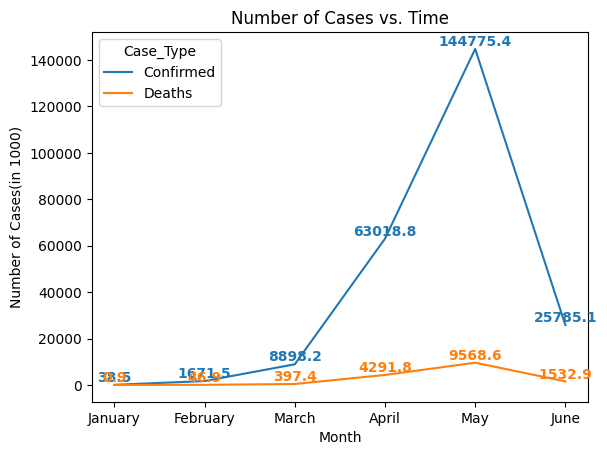

In [ ]:
ax = sns.lineplot(y='Cases in K', x='Month', hue = 'Case_Type', data = Month_Sum )

# Add data labels to the line chart
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.1f}', ha='center', va='bottom',color=line.get_color(), fontweight='bold')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Cases(in 1000)')
plt.title('Number of Cases vs. Time')

In [ ]:
Country_Confirmed_Sum = covid_df_pd_confirmed.groupby(['Country_Region']).agg({
    'Cases': 'sum'
}).reset_index()
# Sort the DataFrame by 'number_of_deaths' column in descending order
Country_Confirmed_Sum = Country_Confirmed_Sum.sort_values(by='Cases', ascending=False)

top_10_countries_confirmed = Country_Confirmed_Sum.head(10)

# Assuming you have already divided the 'column_name' values by 100,000
top_10_countries_confirmed['Cases in K'] = top_10_countries_confirmed['Cases'] / 1000
top_10_countries_confirmed['Cases'] = top_10_countries_confirmed['Cases'] / 1000

# Add 'M' to the end of the numbers to represent millions
top_10_countries_confirmed['Cases in K'] = top_10_countries_confirmed['Cases in K'].apply(lambda x: f'{x:.2f}K')
top_10_countries_confirmed

<ipython-input-36-70c813c248bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_confirmed['Cases in K'] = top_10_countries_confirmed['Cases'] / 1000
<ipython-input-36-70c813c248bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_confirmed['Cases'] = top_10_countries_confirmed['Cases'] / 1000
<ipython-input-36-70c813c248bf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Country_Region,Cases,Cases in K
173,US,73158.080,73158.08K
157,Spain,14042.683,14042.68K
85,Italy,13991.688,13991.69K
177,United Kingdom,11634.123,11634.12K
23,Brazil,11310.710,11310.71K
139,Russia,11108.581,11108.58K
66,Germany,10695.564,10695.56K
62,France,10441.318,10441.32K
36,China,9628.865,9628.86K
172,Turkey,7342.848,7342.85K


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Russia'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'France'),
  Text(8, 0, 'China'),
  Text(9, 0, 'Turkey')])

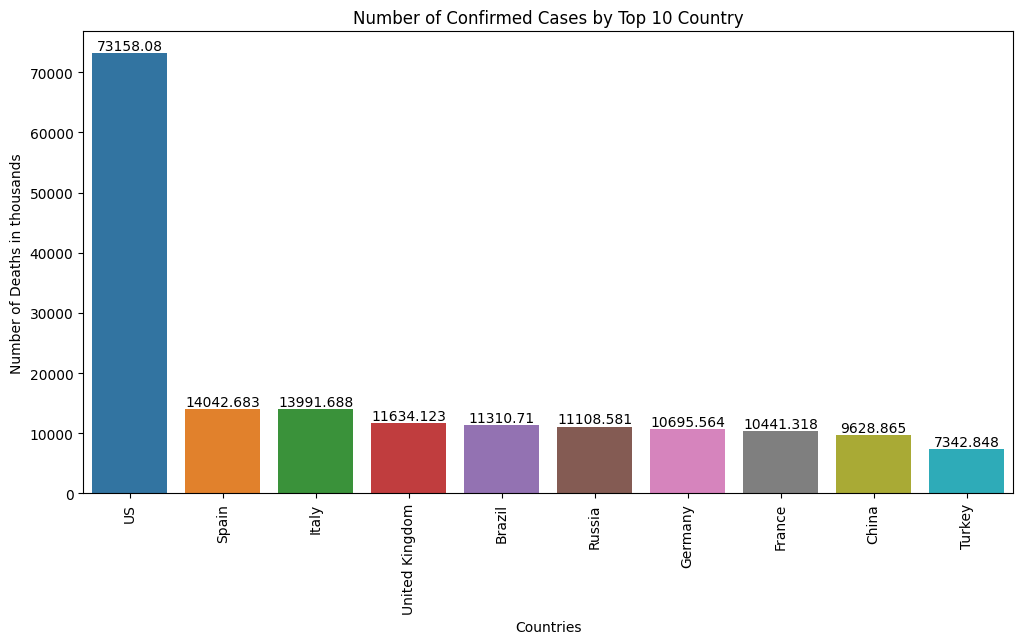

In [ ]:
# Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
ax=sns.barplot(x='Country_Region', y='Cases', data=top_10_countries_confirmed)
plt.title('Number of Confirmed Cases by Top 10 Country')
plt.xlabel('Countries')
plt.ylabel('Number of Deaths in thousands')

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}', ha='center', va='bottom')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
# plt.legend(title='Months')

In [ ]:
Country_death_Sum = covid_df_pd_death.groupby(['Country_Region']).agg({
    'Cases': 'sum'
}).reset_index()
# Sort the DataFrame by 'number_of_deaths' column in descending order
Country_death_Sum = Country_death_Sum.sort_values(by='Cases', ascending=False)

top_10_countries_death = Country_death_Sum.head(10)

# Assuming you have already divided the 'column_name' values by 100,000
top_10_countries_death['Cases in K'] = top_10_countries_death['Cases'] / 1000
top_10_countries_death['Cases'] = top_10_countries_death['Cases'] / 1000

# Add 'M' to the end of the numbers to represent millions
top_10_countries_death['Cases in K'] = top_10_countries_death['Cases in K'].apply(lambda x: f'{x:.2f}K')
top_10_countries_death

<ipython-input-38-e31485e1ff0f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_death['Cases in K'] = top_10_countries_death['Cases'] / 1000
<ipython-input-38-e31485e1ff0f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_death['Cases'] = top_10_countries_death['Cases'] / 1000
<ipython-input-38-e31485e1ff0f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Country_Region,Cases,Cases in K
173,US,4162.893,4162.89K
85,Italy,1868.769,1868.77K
177,United Kingdom,1678.116,1678.12K
157,Spain,1546.134,1546.13K
62,France,1469.256,1469.26K
23,Brazil,704.282,704.28K
16,Belgium,447.865,447.87K
36,China,426.399,426.40K
81,Iran,423.262,423.26K
66,Germany,396.493,396.49K


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'China'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Germany')])

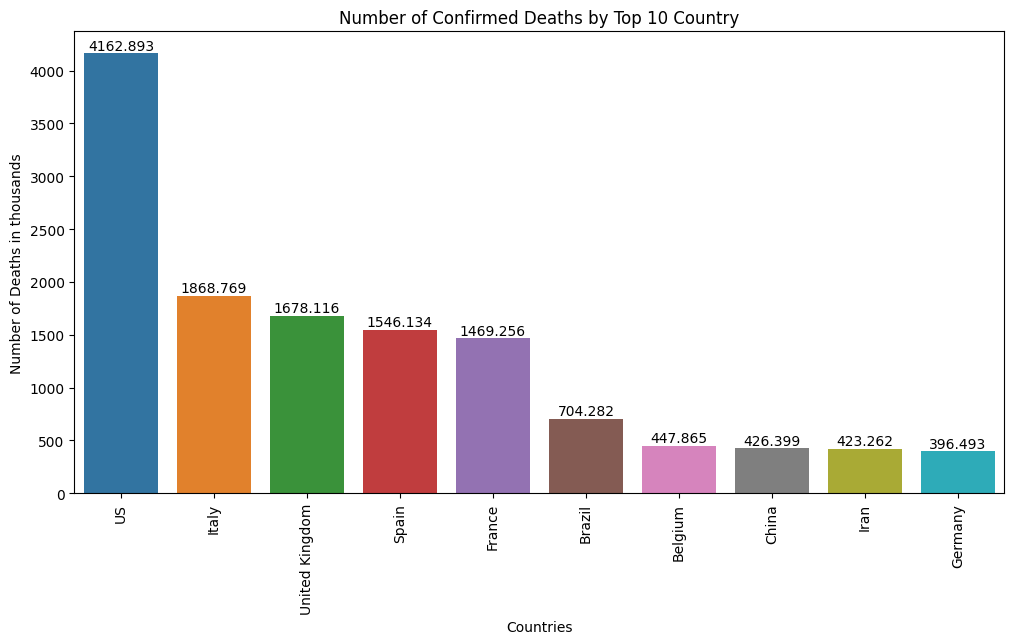

In [ ]:
# Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
ax=sns.barplot(x='Country_Region', y='Cases', data=top_10_countries_death)
plt.title('Number of Confirmed Deaths by Top 10 Country')
plt.xlabel('Countries')
plt.ylabel('Number of Deaths in thousands')

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}', ha='center', va='bottom')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
# plt.legend(title='Months')

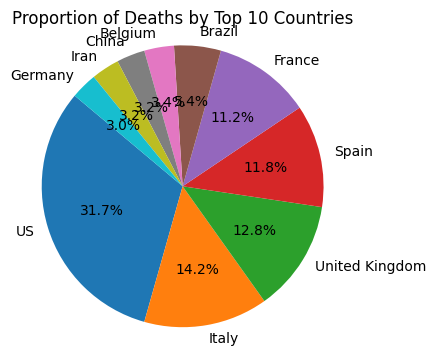

In [ ]:
# Convert the 'Cases' column to proportions for the pie chart
proportions = top_10_countries_death['Cases'] / top_10_countries_death['Cases'].sum()

# Draw the pie chart
plt.figure(figsize=(4, 4))
plt.pie(proportions, labels=top_10_countries_death['Country_Region'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Deaths by Top 10 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plots
plt.show()

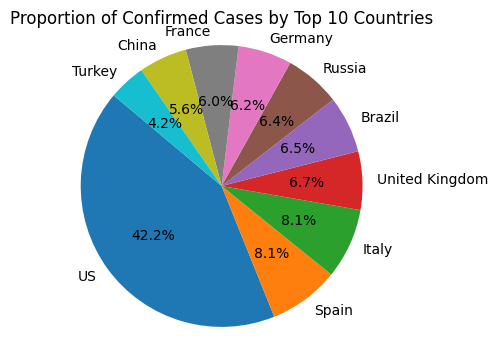

In [ ]:
# Convert the 'Cases' column to proportions for the pie chart
proportions = top_10_countries_confirmed['Cases'] / top_10_countries_confirmed['Cases'].sum()

# Draw the pie chart
plt.figure(figsize=(4, 4))
plt.pie(proportions, labels=top_10_countries_confirmed['Country_Region'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Confirmed Cases by Top 10 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plots
plt.show()

#Analysis of USA filtered Data

In [ ]:
# Filter the DataFrame
US_Confirmed = covid_df_pd_sorted[(covid_df_pd_sorted['Case_Type'] == 'Confirmed') & (covid_df_pd_sorted['Country_Region'] == 'US')]
US_Confirmed.head(1)

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,Year,Day,Month,Month_No,year_month
950669,Confirmed,NaN,0,0,2020-01-22,"Marion, Mississippi, US",US,Mississippi,Marion,US,USA,28091.0,31.231326,-89.820922,24573.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 23:15,2020,22,January,1,2020-Jan


In [ ]:
US_Month_Sum = US_Confirmed.groupby(['Month','Month_No']).agg({
    'Cases': 'sum',
    'People_Total_Tested_Count': 'sum'
}).reset_index()
US_Month_Sum = US_Month_Sum.sort_values('Month_No')
US_Month_Sum['Cases in 1K'] = US_Month_Sum['Cases']/1000
US_Month_Sum['Tested in 1K'] = US_Month_Sum['People_Total_Tested_Count']/1000
US_Month_Sum

,Month,Month_No,Cases,People_Total_Tested_Count,Cases in 1K,Tested in 1K
2,January,1,38,0.0,0.038,0.000
1,February,2,378,0.0,0.378,0.000
4,March,3,1086311,0.0,1086.311,0.000
0,April,4,19495586,83062254.0,19495.586,83062.254
5,May,5,45209354,350857764.0,45209.354,350857.764
3,June,6,7366413,71993999.0,7366.413,71993.999


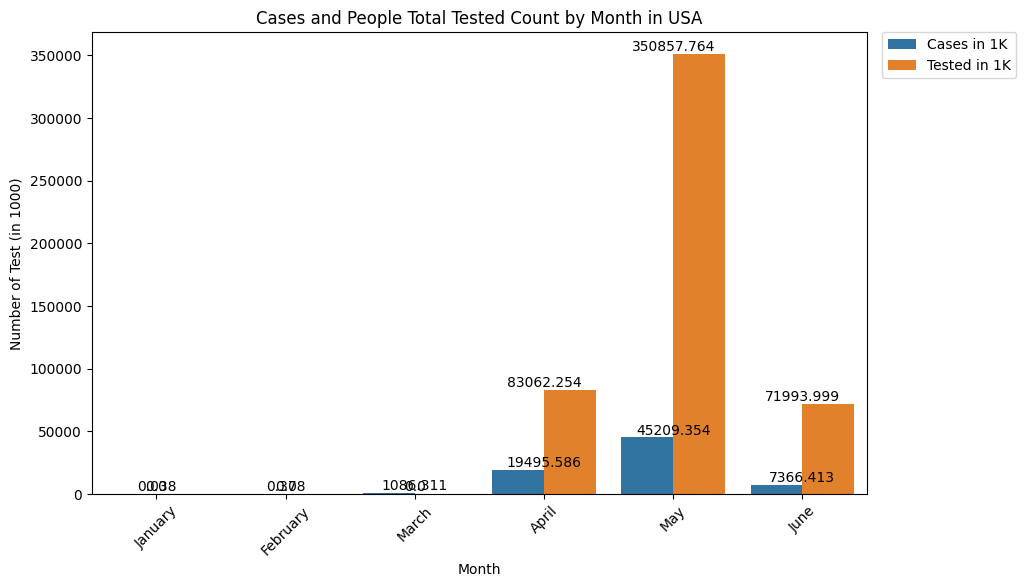

In [ ]:
# Melt the DataFrame to have two variables for x-axis
melted_df = pd.melt(US_Month_Sum, id_vars=['Month'], value_vars=['Cases in 1K', 'Tested in 1K'])

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='value', hue='variable', data=melted_df)
plt.xlabel('Month')
plt.ylabel('Number of Test (in 1000)')
plt.title('Cases and People Total Tested Count by Month in USA')
plt.legend(title='Variables', loc='upper right')
plt.xticks(rotation=45)

# Add data labels to the bars
for index, row in melted_df.iterrows():
    plt.text(index % 6, row['value'], f'{row["value"]}', ha='center', va='bottom')


# Set the legend at the right upper corner
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Show the bar chart
plt.show()


In [ ]:
US_Region_Sum = US_Confirmed.groupby(['Province_State']).agg({
    'Cases': 'sum',
    'People_Total_Tested_Count': 'sum'
}).reset_index()

US_Region_Sum = US_Region_Sum.sort_values(by='Cases', ascending=False)
US_Region_Sum = US_Region_Sum.head(10)

US_Region_Sum['Cases in 1K'] = US_Region_Sum['Cases']/1000
US_Region_Sum['Tested in 1K'] = US_Region_Sum['People_Total_Tested_Count']/1000
US_Region_Sum

,Province_State,Cases,People_Total_Tested_Count,Cases in 1K,Tested in 1K
34,New York,18900226,65230794.0,18900.226,65230.794
32,New Jersey,7398953,21527395.0,7398.953,21527.395
15,Illinois,4145316,24697010.0,4145.316,24697.010
23,Massachusetts,3998649,19761988.0,3998.649,19761.988
5,California,3845353,53919013.0,3845.353,53919.013
41,Pennsylvania,3145732,15439537.0,3145.732,15439.537
24,Michigan,2648544,16098000.0,2648.544,16098.000
10,Florida,2331439,30836781.0,2331.439,30836.781
47,Texas,2227545,28033918.0,2227.545,28033.918
20,Louisiana,1876003,12415312.0,1876.003,12415.312


In [ ]:
# Melt the DataFrame to have two variables for x-axis
region_melted_df = pd.melt(US_Region_Sum, id_vars=['Province_State'], value_vars=['Cases in 1K', 'Tested in 1K'])
region_melted_df

,Province_State,variable,value
0,New York,Cases in 1K,18900.226
1,New Jersey,Cases in 1K,7398.953
2,Illinois,Cases in 1K,4145.316
3,Massachusetts,Cases in 1K,3998.649
4,California,Cases in 1K,3845.353
5,Pennsylvania,Cases in 1K,3145.732
6,Michigan,Cases in 1K,2648.544
7,Florida,Cases in 1K,2331.439
8,Texas,Cases in 1K,2227.545
9,Louisiana,Cases in 1K,1876.003


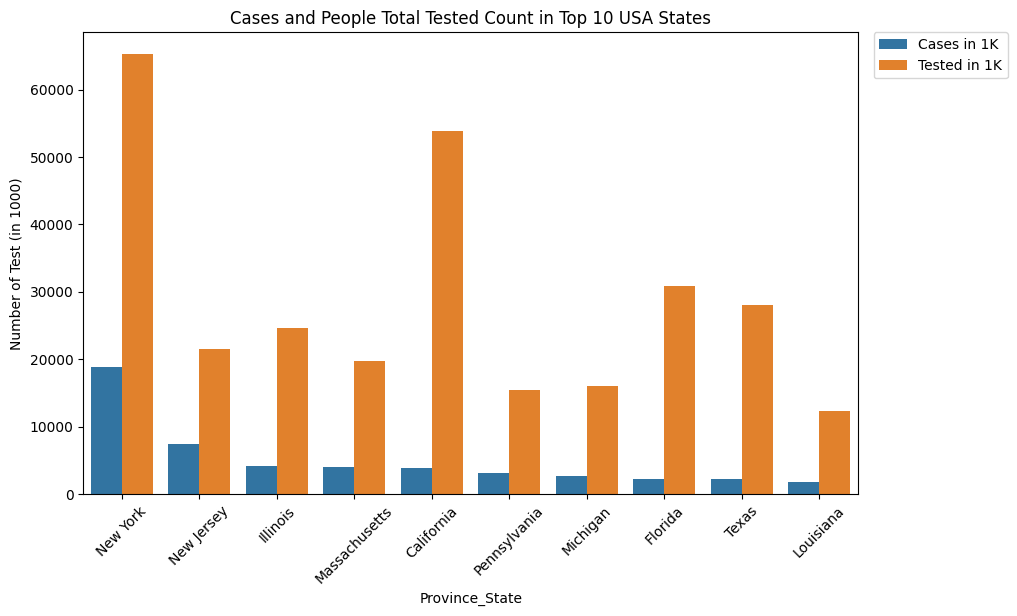

In [ ]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Province_State', y='value', hue='variable', data=region_melted_df)
plt.xlabel('Province_State')
plt.ylabel('Number of Test (in 1000)')
plt.title('Cases and People Total Tested Count in Top 10 USA States')
plt.legend(title='Variables', loc='upper right')
plt.xticks(rotation=45)


# Set the legend at the right upper corner
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Show the bar chart
plt.show()
